<a href="https://colab.research.google.com/github/WhiteWolf088/HCLMini/blob/main/HCL_Mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

* Performing regression analysis to predict the House Rent prices in Chennai by taking all the input parameters(multi linear regression).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Exploratory Data Analysis (EDA) using pandas

In [2]:
# importing data
df=pd.read_csv('https://github.com/venkatakrishnareddychundi/House-rent-prediction/blob/main/Chennai_rent.csv')
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,3.0,BHK,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished,2 bathrooms
1,OWNER,2.0,BHK,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished,2 bathrooms
2,OWNER,2.0,BHK,Apartment,Adyar,"20,000",800.0,Semi-Furnished,2 bathrooms
3,OWNER,2.0,BHK,Apartment,Sembakkam,"14,000",1180.0,Unfurnished,2 bathrooms
4,OWNER,1.0,BHK,Independent House,Mogappair,"7,000",400.0,Unfurnished,1 bathrooms
...,...,...,...,...,...,...,...,...,...
9278,OWNER,3.0,BHK,Apartment,Thoraipakkam OMR,"50,000",1850.0,Furnished,3 bathrooms
9279,OWNER,2.0,BHK,Independent Floor,Sithalapakkam,"13,000",1000.0,Semi-Furnished,2 bathrooms
9280,OWNER,1.0,BHK,Independent Floor,Royapettah,"10,000",460.0,Unfurnished,1 bathrooms
9281,OWNER,2.0,BHK,Independent Floor,Ramavaram,"8,000",700.0,Unfurnished,1 bathrooms


In [3]:
df.head(4)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,3.0,BHK,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished,2 bathrooms
1,OWNER,2.0,BHK,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished,2 bathrooms
2,OWNER,2.0,BHK,Apartment,Adyar,"20,000",800.0,Semi-Furnished,2 bathrooms
3,OWNER,2.0,BHK,Apartment,Sembakkam,"14,000",1180.0,Unfurnished,2 bathrooms


In [4]:
df.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom'],
      dtype='object')

In [5]:
df.shape

(9283, 9)

In [6]:
df.size

83547

In [7]:
df.describe()

,bedroom,area
count,8800.000000,8800.000000
mean,2.150682,1217.070455
std,0.897788,875.826098
min,1.000000,150.000000
25%,2.000000,750.000000
50%,2.000000,1000.000000
75%,3.000000,1400.000000
max,10.000000,12000.000000


In [8]:
# Checking for null values
df.isnull().sum()

seller_type      483
bedroom          483
layout_type      483
property_type    483
locality         483
price            483
area             483
furnish_type     483
bathroom         579
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['bathroom']=df['bathroom'].str.replace('bathrooms','')

In [11]:
df['furnish_type'].unique()

array(['Semi-Furnished', 'Unfurnished', 'Furnished', nan], dtype=object)

In [12]:
df['layout_type'].unique()

array(['BHK', 'RK', nan], dtype=object)

In [13]:
df['property_type'].unique()

array(['Apartment', 'Independent House', 'Independent Floor',
       'Studio Apartment', 'Villa', 'Penthouse', nan], dtype=object)

In [14]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,3.0,BHK,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished,2
1,OWNER,2.0,BHK,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished,2
2,OWNER,2.0,BHK,Apartment,Adyar,"20,000",800.0,Semi-Furnished,2
3,OWNER,2.0,BHK,Apartment,Sembakkam,"14,000",1180.0,Unfurnished,2
4,OWNER,1.0,BHK,Independent House,Mogappair,"7,000",400.0,Unfurnished,1
...,...,...,...,...,...,...,...,...,...
9278,OWNER,3.0,BHK,Apartment,Thoraipakkam OMR,"50,000",1850.0,Furnished,3
9279,OWNER,2.0,BHK,Independent Floor,Sithalapakkam,"13,000",1000.0,Semi-Furnished,2
9280,OWNER,1.0,BHK,Independent Floor,Royapettah,"10,000",460.0,Unfurnished,1
9281,OWNER,2.0,BHK,Independent Floor,Ramavaram,"8,000",700.0,Unfurnished,1


In [15]:
df['bathroom'].unique()

array(['2 ', '1 ', '3 ', '4 ', nan, '5 ', 'East facing', '6 ',
       'North facing', '7 ', 'West facing', 'NorthEast facing', '9 ',
       '8 ', 'South facing', '10 '], dtype=object)

In [16]:
df['bathroom']=df['bathroom'].str.replace('East facing','10')
df['bathroom']=df['bathroom'].str.replace('North facing','11')
df['bathroom']=df['bathroom'].str.replace('West facing','12')
df['bathroom']=df['bathroom'].str.replace('NorthEast facing','13')
df['bathroom']=df['bathroom'].str.replace('South facing','14')
df['bathroom']=df['bathroom'].str.replace('North10','15')

In [17]:
df['bathroom'].unique()

array(['2 ', '1 ', '3 ', '4 ', nan, '5 ', '10', '6 ', '11', '7 ', '12',
       '15', '9 ', '8 ', '14', '10 '], dtype=object)

In [18]:
df.dropna(axis=0,inplace=True)

In [19]:
df['bathroom']=df['bathroom'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6258 entries, 0 to 9282
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    6258 non-null   object 
 1   bedroom        6258 non-null   float64
 2   layout_type    6258 non-null   object 
 3   property_type  6258 non-null   object 
 4   locality       6258 non-null   object 
 5   price          6258 non-null   object 
 6   area           6258 non-null   float64
 7   furnish_type   6258 non-null   object 
 8   bathroom       6258 non-null   float64
dtypes: float64(3), object(6)
memory usage: 488.9+ KB


In [21]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,3.0,BHK,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished,2.0
1,OWNER,2.0,BHK,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished,2.0
2,OWNER,2.0,BHK,Apartment,Adyar,"20,000",800.0,Semi-Furnished,2.0
3,OWNER,2.0,BHK,Apartment,Sembakkam,"14,000",1180.0,Unfurnished,2.0
4,OWNER,1.0,BHK,Independent House,Mogappair,"7,000",400.0,Unfurnished,1.0
...,...,...,...,...,...,...,...,...,...
9278,OWNER,3.0,BHK,Apartment,Thoraipakkam OMR,"50,000",1850.0,Furnished,3.0
9279,OWNER,2.0,BHK,Independent Floor,Sithalapakkam,"13,000",1000.0,Semi-Furnished,2.0
9280,OWNER,1.0,BHK,Independent Floor,Royapettah,"10,000",460.0,Unfurnished,1.0
9281,OWNER,2.0,BHK,Independent Floor,Ramavaram,"8,000",700.0,Unfurnished,1.0


In [22]:
df['price']=df['price'].str.replace(',','').astype('float')

## Visualization Using Matplotlib and Seaborn

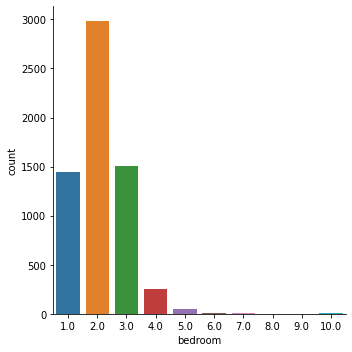

In [23]:
sns.catplot(x='bedroom',kind='count',data=df)

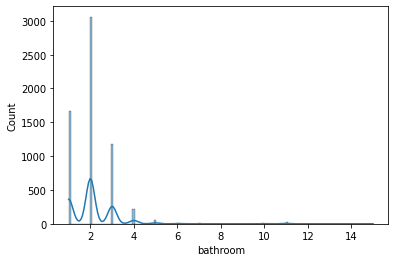

In [24]:
sns.histplot(df['bathroom'],kde=True)

## Preprocessing

In [25]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,3.0,BHK,Apartment,Ambattur,17000.0,1570.0,Semi-Furnished,2.0
1,OWNER,2.0,BHK,Apartment,Kelambakkam,16000.0,1402.0,Semi-Furnished,2.0
2,OWNER,2.0,BHK,Apartment,Adyar,20000.0,800.0,Semi-Furnished,2.0
3,OWNER,2.0,BHK,Apartment,Sembakkam,14000.0,1180.0,Unfurnished,2.0
4,OWNER,1.0,BHK,Independent House,Mogappair,7000.0,400.0,Unfurnished,1.0


In [26]:
x=df.iloc[:,[1,2,3,6,7,8]]

In [27]:
x.head()

,bedroom,layout_type,property_type,area,furnish_type,bathroom
0,3.0,BHK,Apartment,1570.0,Semi-Furnished,2.0
1,2.0,BHK,Apartment,1402.0,Semi-Furnished,2.0
2,2.0,BHK,Apartment,800.0,Semi-Furnished,2.0
3,2.0,BHK,Apartment,1180.0,Unfurnished,2.0
4,1.0,BHK,Independent House,400.0,Unfurnished,1.0


In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6258 entries, 0 to 9282
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        6258 non-null   float64
 1   layout_type    6258 non-null   object 
 2   property_type  6258 non-null   object 
 3   area           6258 non-null   float64
 4   furnish_type   6258 non-null   object 
 5   bathroom       6258 non-null   float64
dtypes: float64(3), object(3)
memory usage: 471.3+ KB


In [29]:
x_numeric=pd.get_dummies(x)

In [30]:
x_numeric.head()

,bedroom,area,bathroom,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Furnished,furnish_type_Semi-Furnished,furnish_type_Unfurnished
0,3.0,1570.0,2.0,1,0,1,0,0,0,0,0,0,1,0
1,2.0,1402.0,2.0,1,0,1,0,0,0,0,0,0,1,0
2,2.0,800.0,2.0,1,0,1,0,0,0,0,0,0,1,0
3,2.0,1180.0,2.0,1,0,1,0,0,0,0,0,0,0,1
4,1.0,400.0,1.0,1,0,0,0,1,0,0,0,0,0,1


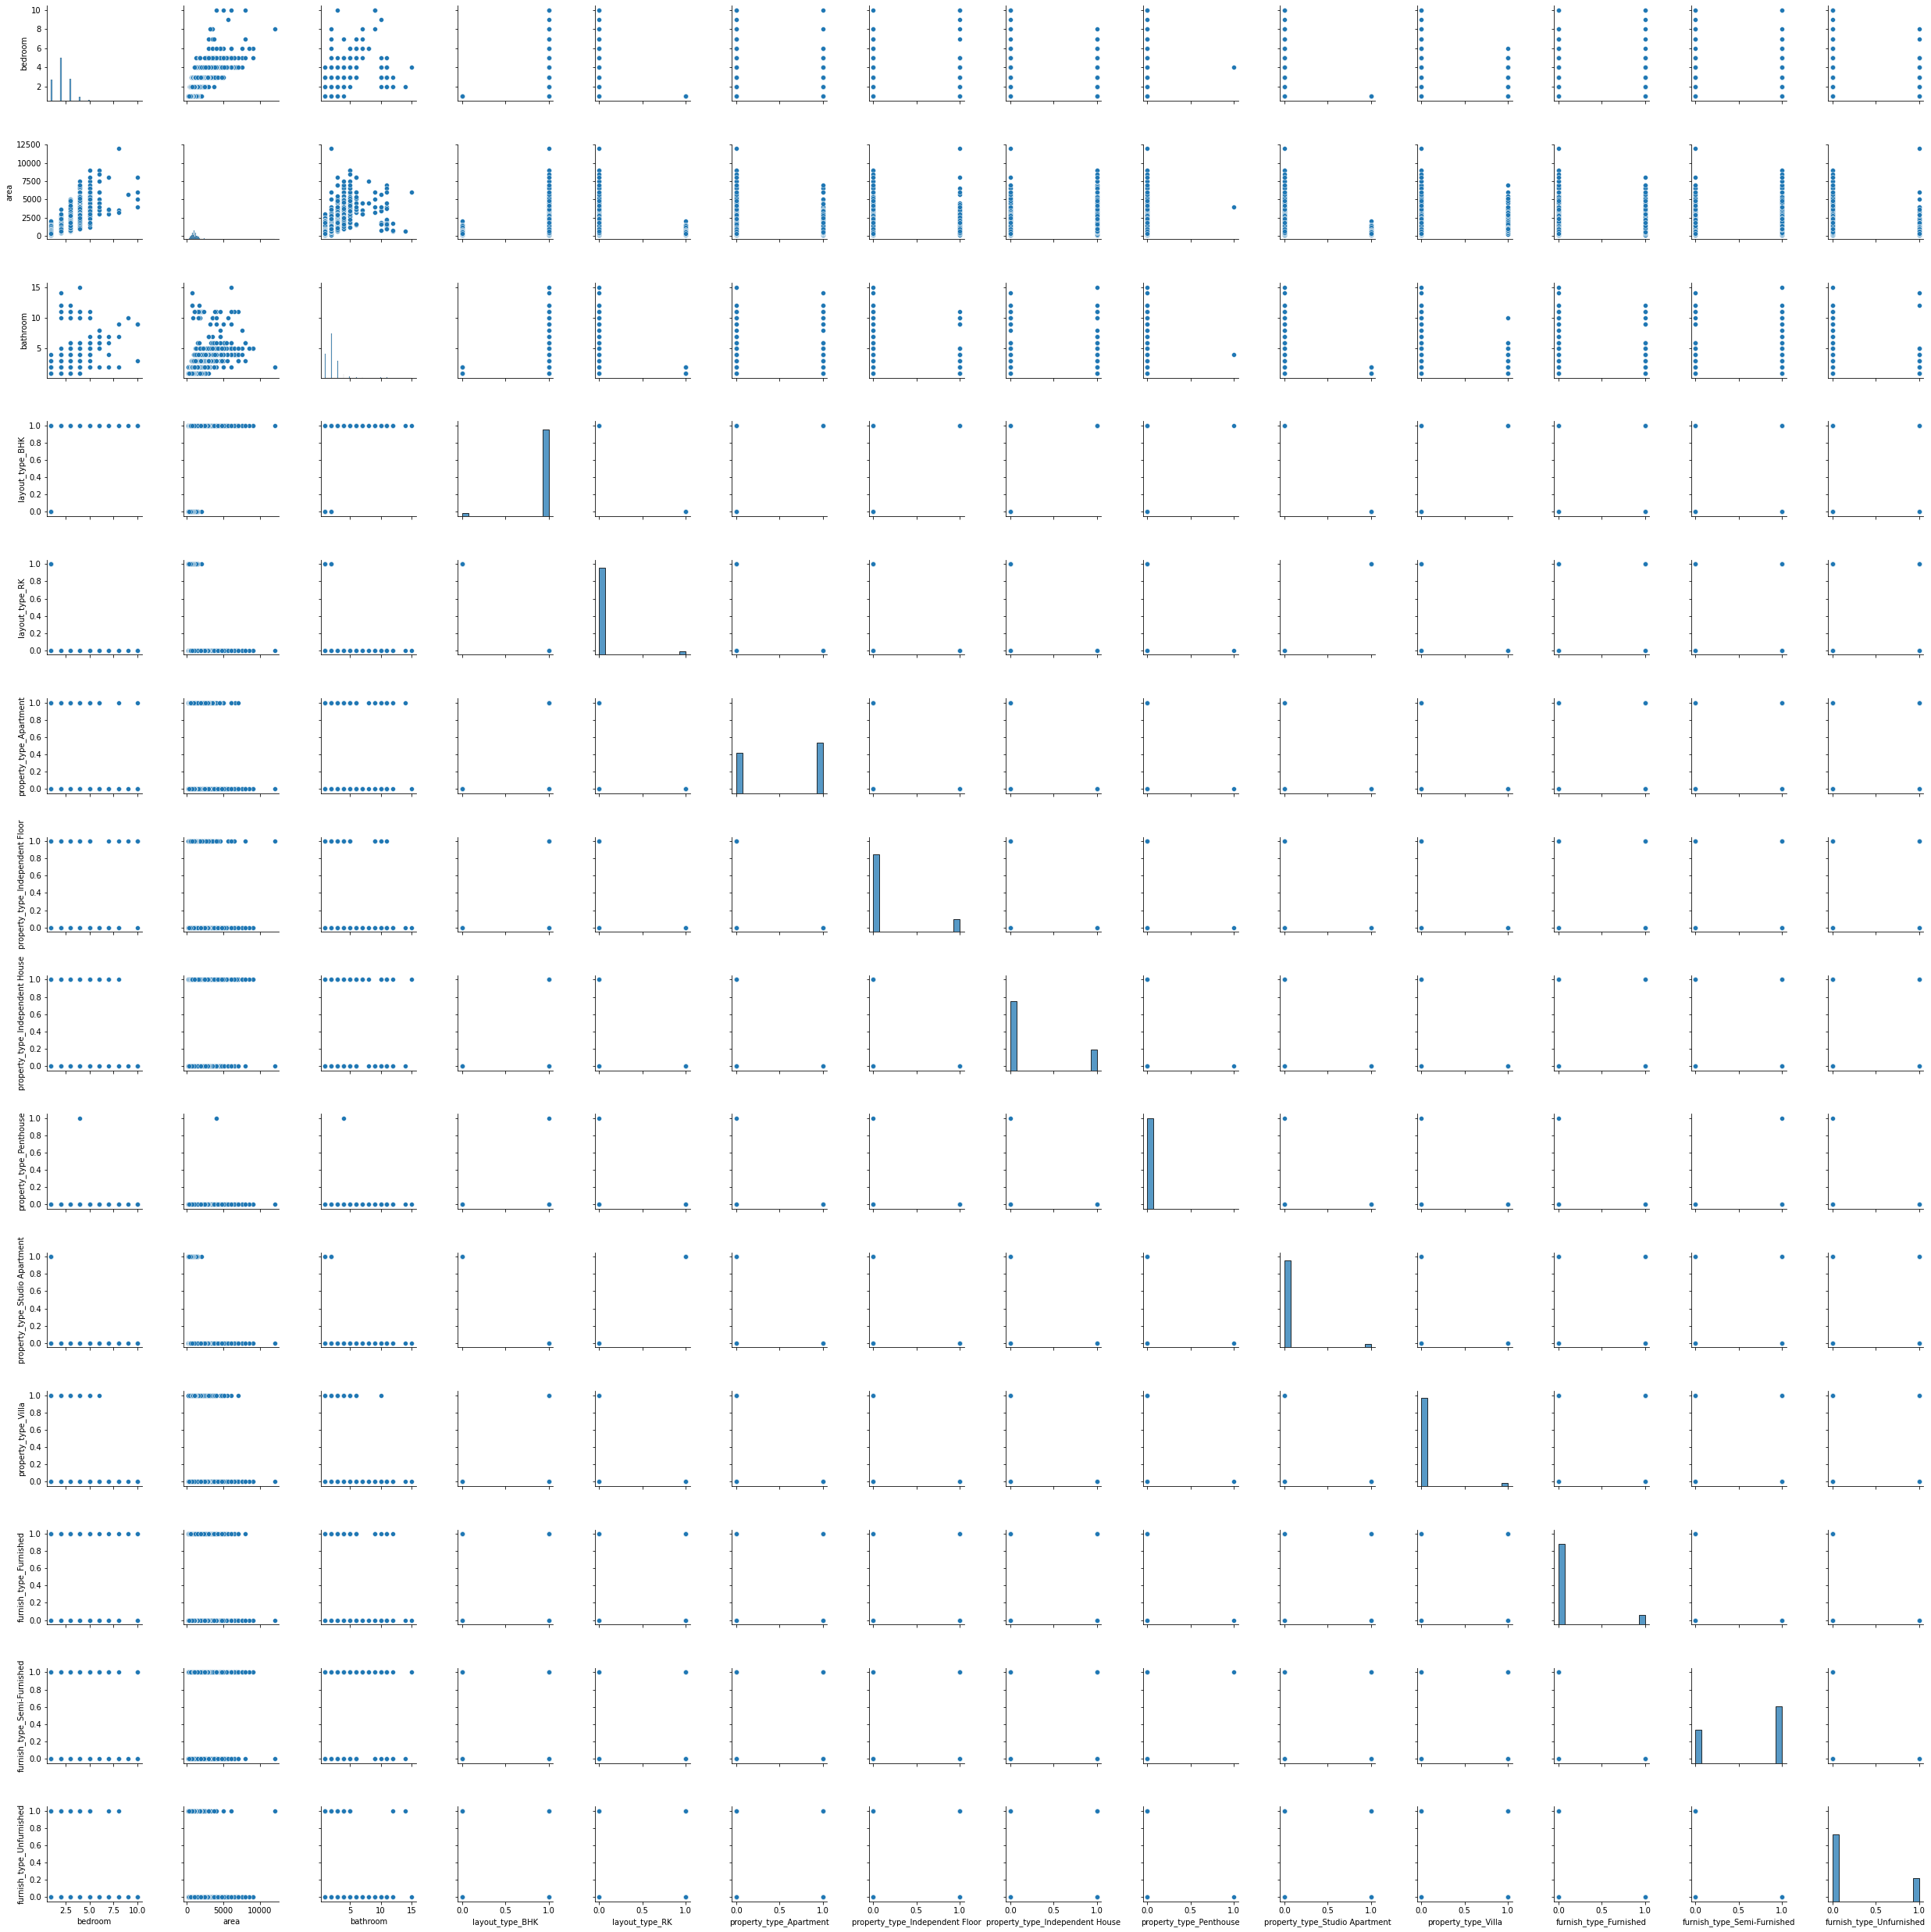

In [31]:
sns.pairplot(x_numeric)

In [32]:
x_numeric.isnull().sum()

bedroom                            0
area                               0
bathroom                           0
layout_type_BHK                    0
layout_type_RK                     0
property_type_Apartment            0
property_type_Independent Floor    0
property_type_Independent House    0
property_type_Penthouse            0
property_type_Studio Apartment     0
property_type_Villa                0
furnish_type_Furnished             0
furnish_type_Semi-Furnished        0
furnish_type_Unfurnished           0
dtype: int64

In [33]:
y=df['price']

In [34]:
y.isnull().sum()

0

In [35]:
y.dropna(axis=0,inplace=True)

In [36]:
y.head()

0    17000.0
1    16000.0
2    20000.0
3    14000.0
4     7000.0
Name: price, dtype: float64

## Splitting Data into Training and Testing Datasets

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_numeric,y,test_size=0.2,random_state=7)

In [38]:
x_train.shape,y_train.shape

((5006, 14), (5006,))

In [39]:
x_test.shape,y_test.shape

((1252, 14), (1252,))

In [40]:
x_train.size,y_train.size

(70084, 5006)

In [41]:
x_test.size,y_test.size

(17528, 1252)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
model = DecisionTreeRegressor(random_state = 7)
model.fit(x_train, y_train)
model.score(x_train,y_train)

0.8312880263227765

In [43]:
x_test.head(2)

,bedroom,area,bathroom,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Furnished,furnish_type_Semi-Furnished,furnish_type_Unfurnished
7120,2.0,1100.0,2.0,1,0,0,1,0,0,0,0,0,1,0
5635,2.0,1091.0,2.0,1,0,1,0,0,0,0,0,0,1,0


In [44]:
input=[2.0,1100.0,2.0,1,0,0,1,0,0,0,0,'Unfurnished']
Fur_list=[]
if input[11]=='Full Furniture':
  input.remove('Furniture')
  Fur_list.append(1)
  Fur_list.append(0)
  Fur_list.append(0)
elif input[11]=='Semi Furniture':
  input.remove('Semi Furniture')
  Fur_list.append(0)
  Fur_list.append(1)
  Fur_list.append(0)
elif input[11]=='Unfurnished':
  input.remove('Unfurnished')
  Fur_list.append(0)
  Fur_list.append(0)
  Fur_list.append(1)

input_2=input+Fur_list
last_input=tuple(input_2)

In [45]:
input_2

[2.0, 1100.0, 2.0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]

In [46]:
last_input

(2.0, 1100.0, 2.0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1)

In [47]:
input_numpy=np.asarray(last_input)
input_reshape=input_numpy.reshape(1,-1)
pred=model.predict(input_reshape)
print(pred)

[14562.5]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [48]:
import pickle

In [49]:
filename = 'Rent_prediction_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [50]:
laoded_model = pickle.load(open(filename,'rb'))
laoded_model.predict(input_reshape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([14562.5])

👨‍💻 Project Completed by --> **CH VENKATA KRISHNA REDDY**